In [182]:

# Import necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
#tf.keras.losses import Huber
from keras.optimizers import SGD
import tensorflow.keras.losses 

In [183]:
url = 'https://raw.githubusercontent.com/gitsandyhub/Stock-Market-Prediction/master/GOOGL.csv'
df = pd.read_csv(url)

In [184]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
493,2019-08-23,1185.170044,1195.670044,1150.000000,1153.579956,1153.579956,1812700
494,2019-08-26,1159.449951,1171.859985,1154.849976,1171.180054,1171.180054,1058300
495,2019-08-27,1183.000000,1185.000000,1164.560059,1170.819946,1170.819946,1173000
496,2019-08-28,1164.869995,1178.500000,1160.250000,1173.750000,1173.750000,840500
497,2019-08-29,1186.420044,1199.189941,1185.280029,1194.239990,1194.239990,981800
498,2019-08-30,1200.349976,1200.349976,1185.719971,1190.530029,1190.530029,903200
499,2019-09-03,1181.849976,1189.079956,1163.709961,1169.550049,1169.550049,1295400
500,2019-09-04,1179.449951,1184.880005,1171.530029,1182.270020,1182.270020,1065600
501,2019-09-05,1193.660034,1214.000000,1192.689941,1212.189941,1212.189941,1319700
502,2019-09-06,1209.140015,1212.949951,1203.260010,1206.319946,1206.319946,944900


In [185]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-07,944.250000,950.500000,937.530029,949.890015,949.890015,1116600
2017-09-08,949.700012,950.700012,940.010010,941.409973,941.409973,999900
2017-09-11,947.200012,952.679993,941.000000,943.289978,943.289978,1337400
2017-09-12,946.919983,948.090027,937.500000,946.650024,946.650024,1284800
2017-09-13,945.500000,952.849976,944.739990,950.440002,950.440002,1095400


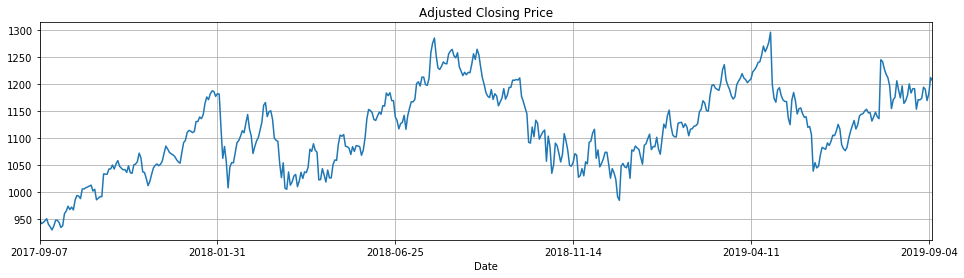

In [149]:
df['Adj Close'].plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [150]:
window_size = 60 # Allow us to look at 60 days into the past
# Prepare the data so that we have 60 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [151]:

data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [152]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [153]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [154]:
#Method 1 : Linear Model

# Train
Linear_model = linear_model.LinearRegression()
Linear_model.fit(X_train, y_train)

# Infer
y_pred_train_linear = Linear_model.predict(X_train)
y_pred_linear = Linear_model.predict(X_test)

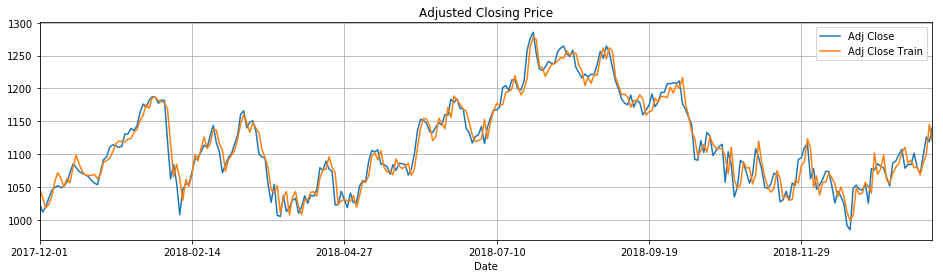

In [155]:
# Plot what it looks like for the training data
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_linear['Adj Close Train'] = y_pred_train_linear[:-window_size]
df_linear.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

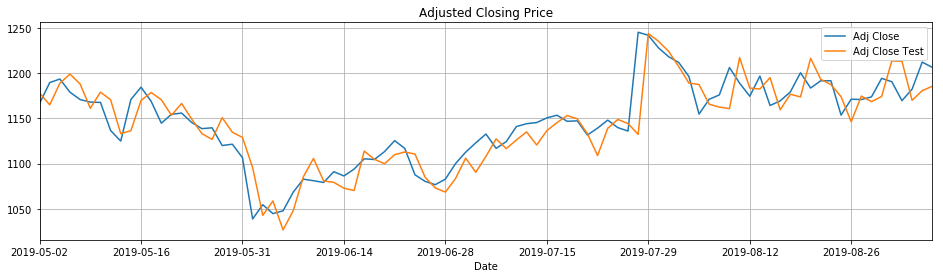

In [156]:
# Same for the test
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[ind_split+window_size:]
df_linear['Adj Close Test'] = y_pred_linear
df_linear.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [187]:
#Method 2 : Ridge Model
# Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

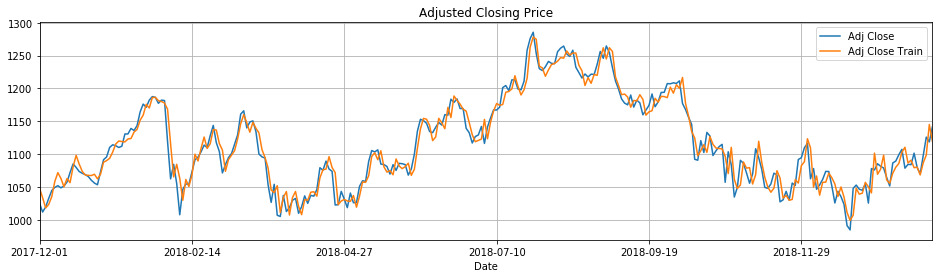

In [188]:
# Plot what it looks like for the training data
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='MSI', figsize=(16,4), title='Adjusted Closing Price', grid=True)

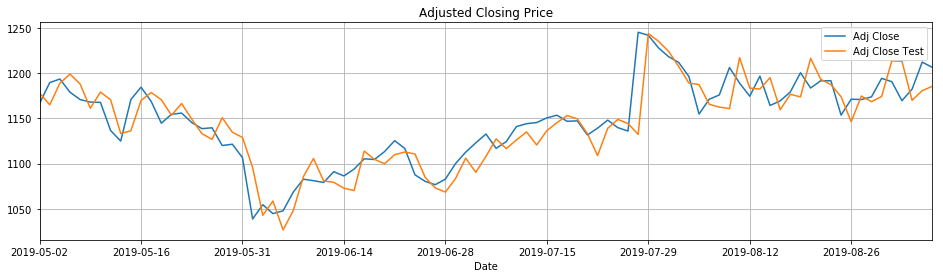

In [159]:
# Same for the test
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [160]:
#Method 3 : Lasso Model

# Train
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Infer
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

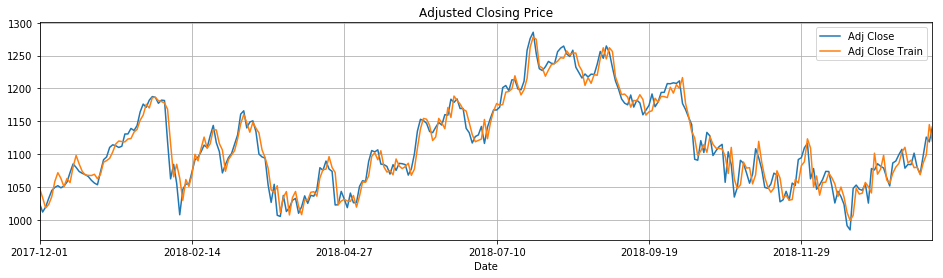

In [161]:

# Plot what it looks like for the training data
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

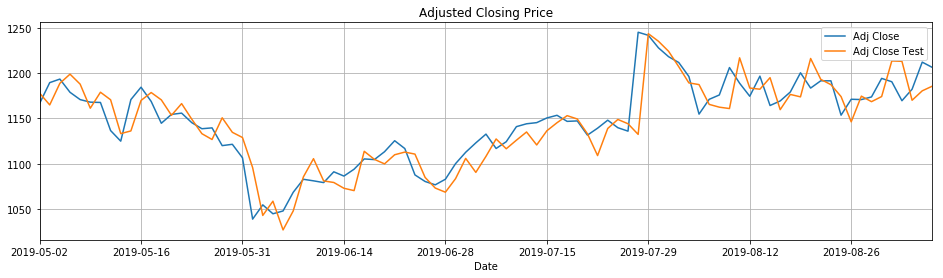

In [162]:
# Same for the test
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:]
df_lasso['Adj Close Test'] = y_pred_lasso
df_lasso.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [163]:
#Method4 - LARS Lasso

# Train
larslasso_model = linear_model.LassoLars(alpha=.1)
larslasso_model.fit(X_train, y_train)

# Infer
y_pred_train_larslasso = larslasso_model.predict(X_train)
y_pred_larslasso = larslasso_model.predict(X_test)

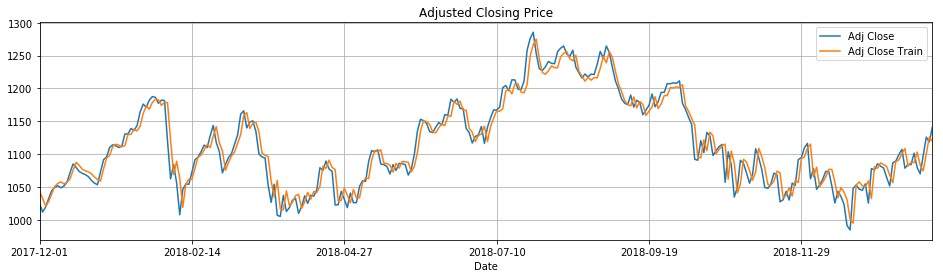

In [164]:
# Plot what it looks like for the training data
df_larslasso = df.copy()
df_larslasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_larslasso = df_larslasso.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_larslasso['Adj Close Train'] = y_pred_train_larslasso[:-window_size]
df_larslasso.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

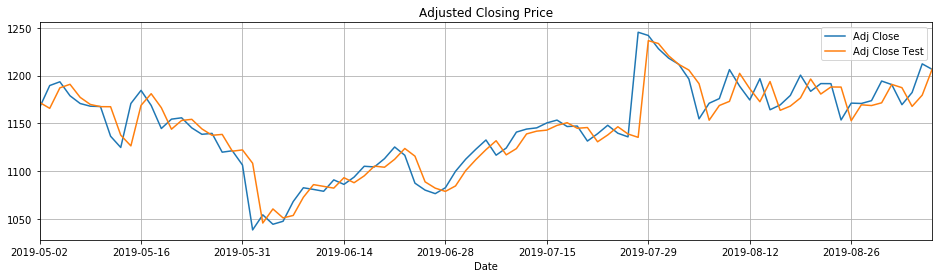

In [165]:
# Same for the test
df_larslasso = df.copy()
df_larslasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_larslasso = df_larslasso.iloc[ind_split+window_size:]
df_larslasso['Adj Close Test'] = y_pred_larslasso
df_larslasso.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [166]:
# Method 5 - Gradient Boosting Trees
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Infer
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)


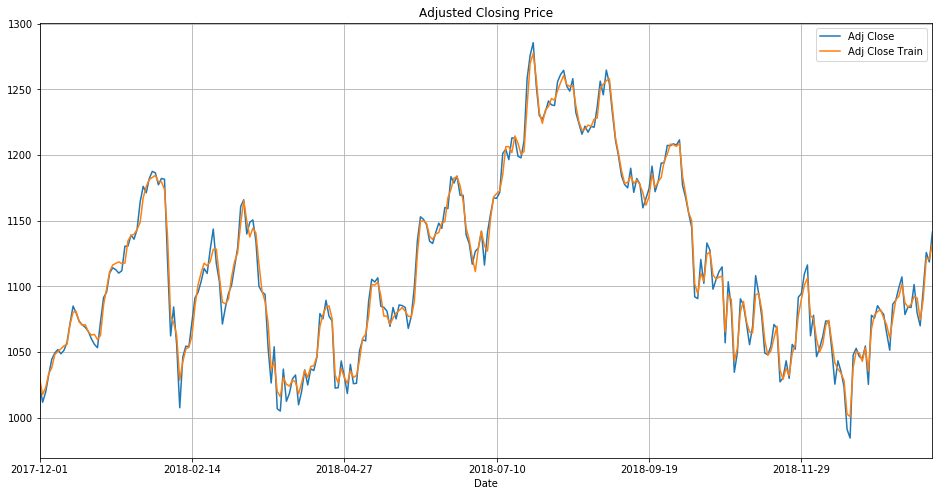

In [167]:
# Plot what it looks like for the training data
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)

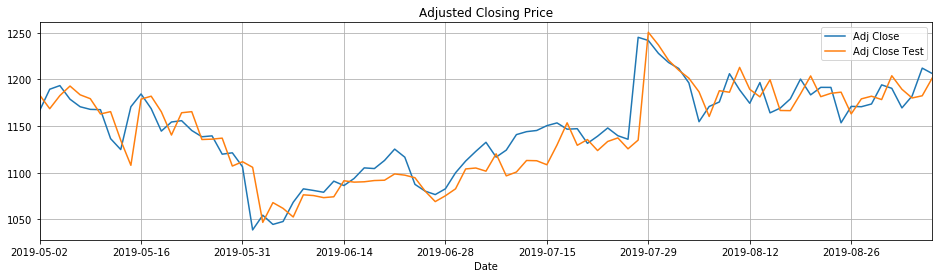

In [168]:
# Same for the test
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:] 
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [189]:
# Method  K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
kn_model = KNeighborsRegressor()
kn_model.fit(X_train, y_train)

# Infer
y_pred_train_kn = kn_model.predict(X_train)
y_pred_kn = kn_model.predict(X_test)

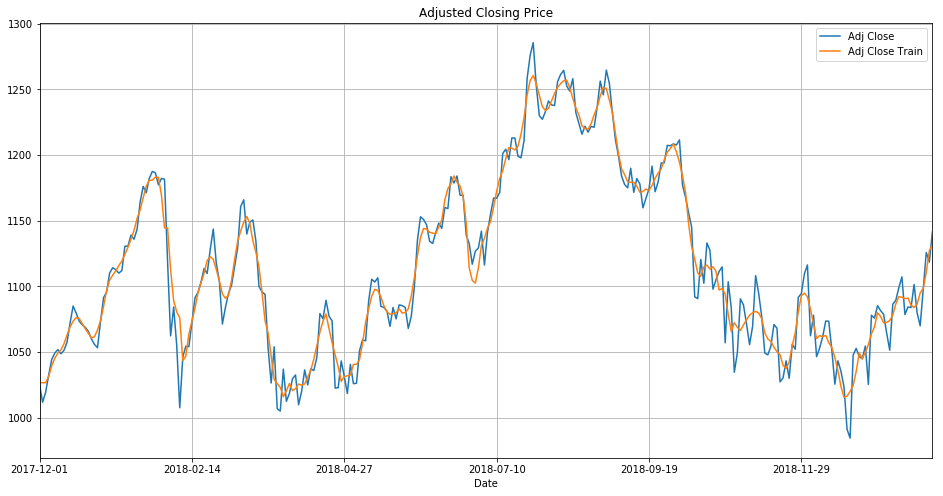

In [190]:
# Plot what it looks like for the training data
df_kn = df.copy()
df_kn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_kn = df_kn.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_kn['Adj Close Train'] = y_pred_train_kn[:-window_size]
df_kn.plot(label='GOOG', figsize=(16,8), title='Adjusted Closing Price', grid=True)

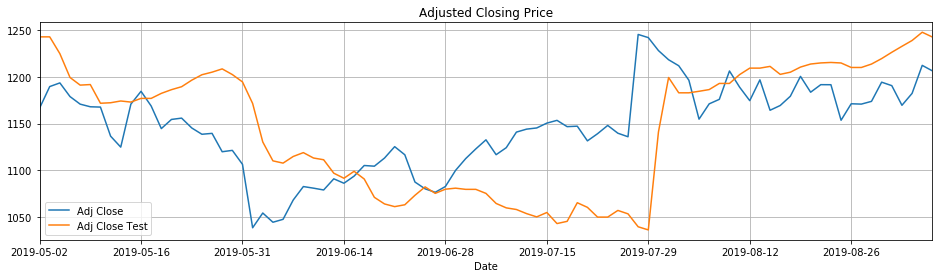

In [191]:
# Same for the test
df_kn = df.copy()
df_kn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_kn = df_kn.iloc[ind_split+window_size:] 
df_kn['Adj Close Test'] = y_pred_kn
df_kn.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [169]:
# Model #6 - Using Neural Networks with 1D convolutional and LSTM Layers
#The last method we'll use is a neural network based one using Keras / Tensorflow. 
#We use a stack of Conv1D and LSTM layers, followed by Dense layers lastly followed by a 
#linear layer to predict the stock price

keras_model = Sequential([
  Conv1D(filters=128, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="tanh"),
  Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="tanh"),
  LSTM(128, return_sequences=True),
  LSTM(128),
  Dense(64, activation="tanh"),
  Dense(64, activation="tanh"),
  Dense(1)
])

keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 60, 128)           768       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 60, 128)           82048     
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total para

In [170]:
# First figure out the right learning rate
lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = SGD(lr=1e-8, momentum=0.9)
keras_model.compile(loss='mean_squared_error',
                    optimizer=optimizer,
                    metrics=["mae"])
# Scale the data due to LSTM units
scaler = MinMaxScaler(feature_range=(-1, 1))
data_transform = scaler.fit_transform(df['Adj Close'].values[:,None])
data_transform = data_transform[indices]
X2 = data_transform[:,:-1]
y2 = data_transform[:,-1]
X_train_reshape = X2[:ind_split]
y_train_reshape = y2[:ind_split]
X_test_reshape = X2[ind_split:]
y_test_reshape = y2[ind_split:]

In [171]:
history = keras_model.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, callbacks=[lr_schedule], validation_data=(X_test_reshape, y_test_reshape))

Train on 354 samples, validate on 89 samples
Epoch 1/250
354/354 [==============================] - 7s 20ms/step - loss: 0.1259 - mean_absolute_error: 0.2934 - val_loss: 0.0792 - val_mean_absolute_error: 0.2352
Epoch 2/250
354/354 [==============================] - 1s 4ms/step - loss: 0.1259 - mean_absolute_error: 0.2934 - val_loss: 0.0792 - val_mean_absolute_error: 0.2352
Epoch 3/250
354/354 [==============================] - 1s 3ms/step - loss: 0.1259 - mean_absolute_error: 0.2934 - val_loss: 0.0792 - val_mean_absolute_error: 0.2352
Epoch 4/250
354/354 [==============================] - 2s 5ms/step - loss: 0.1259 - mean_absolute_error: 0.2934 - val_loss: 0.0792 - val_mean_absolute_error: 0.2352
Epoch 5/250
354/354 [==============================] - 2s 7ms/step - loss: 0.1259 - mean_absolute_error: 0.2934 - val_loss: 0.0792 - val_mean_absolute_error: 0.2352
Epoch 6/250
354/354 [==============================] - 2s 6ms/step - loss: 0.1259 - mean_absolute_error: 0.2934 - val_loss: 0.079

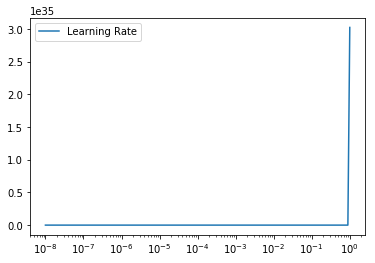

In [172]:
plt.semilogx(history.history['lr'], history.history['val_loss'])
plt.legend(['Learning Rate', 'Validation Loss'])

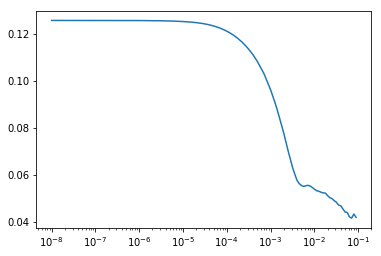

In [173]:
plt.semilogx(history.history['lr'][:140], history.history['loss'][:140])

In [174]:
# Observing the above graph, 0.1 seems to be the best learning rate
keras_model = Sequential([
  Conv1D(filters=128, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="tanh"),
  Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="tanh"),
  LSTM(128, return_sequences=True),
  LSTM(128),
  Dense(64, activation="tanh"),
  Dense(64, activation="tanh"),
  Dense(1)
])


optimizer = SGD(lr=0.1, momentum=0.9)
keras_model.compile(loss='mean_squared_error',
                    optimizer=optimizer,
                    metrics=["mae"])
history = keras_model.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, validation_data=(X_test_reshape, y_test_reshape))

Train on 354 samples, validate on 89 samples
Epoch 1/250
354/354 [==============================] - 5s 15ms/step - loss: 0.1424 - mean_absolute_error: 0.3121 - val_loss: 0.0497 - val_mean_absolute_error: 0.1621
Epoch 2/250
354/354 [==============================] - 1s 3ms/step - loss: 0.0708 - mean_absolute_error: 0.2157 - val_loss: 0.0866 - val_mean_absolute_error: 0.2413
Epoch 3/250
354/354 [==============================] - 2s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.2423 - val_loss: 0.0906 - val_mean_absolute_error: 0.2374
Epoch 4/250
354/354 [==============================] - 2s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.1883 - val_loss: 0.0616 - val_mean_absolute_error: 0.2019
Epoch 5/250
354/354 [==============================] - 2s 7ms/step - loss: 0.0839 - mean_absolute_error: 0.2357 - val_loss: 0.0396 - val_mean_absolute_error: 0.1424
Epoch 6/250
354/354 [==============================] - 2s 7ms/step - loss: 0.0648 - mean_absolute_error: 0.2040 - val_loss: 0.057

In [175]:
y_pred_train_keras = scaler.inverse_transform(keras_model.predict(X_train_reshape, batch_size=256))
y_pred_keras = scaler.inverse_transform(keras_model.predict(X_test_reshape, batch_size=256))

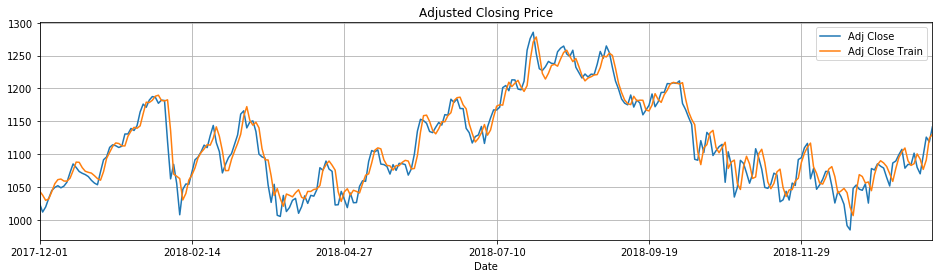

In [176]:
# Plot what it looks like for the training data
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[window_size:ind_split] # Past 60 days we don't know yet
df_keras['Adj Close Train'] = y_pred_train_keras[:-window_size]
df_keras.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

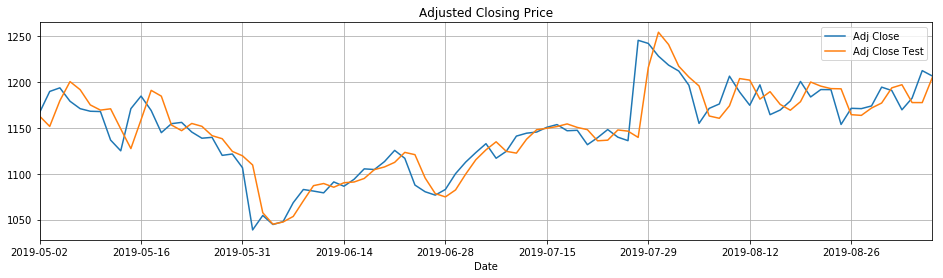

In [177]:
# Same for the test
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[ind_split+window_size:] # Past 60 days we don't know yet
df_keras['Adj Close Test'] = y_pred_keras
df_keras.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

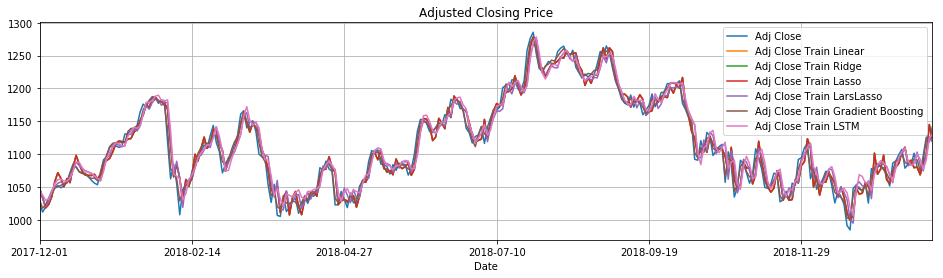

In [178]:
df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split] # Past 60 days we don't know yet
# Add in all of our methods
df_train['Adj Close Train Linear'] = y_pred_train_linear[:-window_size]
df_train['Adj Close Train Ridge'] = y_pred_train_ridge[:-window_size]
df_train['Adj Close Train Lasso'] = y_pred_train_lasso[:-window_size]
df_train['Adj Close Train LarsLasso'] = y_pred_train_larslasso[:-window_size]
df_train['Adj Close Train Gradient Boosting'] = y_pred_train_gb[:-window_size]
df_train['Adj Close Train LSTM'] = y_pred_train_keras[:-window_size]
# Plot the data now
df_train.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

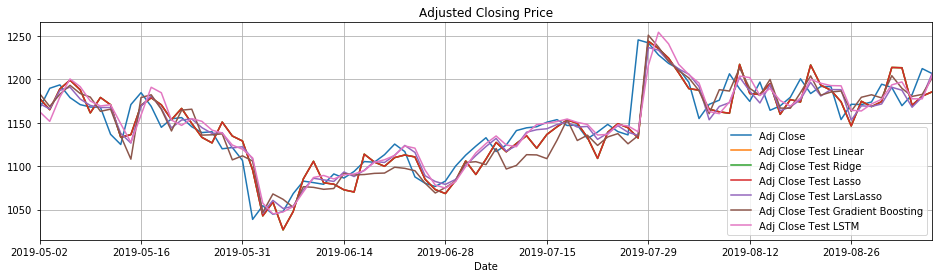

In [179]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] # Past 60 days we don't know yet
# Add in all of our methods
df_test['Adj Close Test Linear'] = y_pred_linear
df_test['Adj Close Test Ridge'] = y_pred_ridge
df_test['Adj Close Test Lasso'] = y_pred_lasso
df_test['Adj Close Test LarsLasso'] = y_pred_larslasso
df_test['Adj Close Test Gradient Boosting'] = y_pred_gb
df_test['Adj Close Test LSTM'] = y_pred_keras
# Plot the data now
df_test.plot(label='GOOG', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [180]:

num_days = 10 # Let's try and forecase the next 10 days or two years

# Get the last window_size (60) days
data_seed = df['Adj Close'].values[-window_size:][None]
# Get the normalized data as well for the neural network
data_seed_norm = scaler.transform(data_seed)
input_values = {"linear": data_seed,"ridge": data_seed, "lasso": data_seed,"larslasso": data_seed, "gb": data_seed, "keras": data_seed_norm.copy()}
values = {"linear": [],"ridge": [], "lasso":[],"larslasso":[], "gb": [], "keras": []}
for i in range(num_days):

    values["linear"].append(Linear_model.predict(input_values["linear"])[0])
    values["ridge"].append(ridge_model.predict(input_values["ridge"])[0])
    values["lasso"].append(lasso_model.predict(input_values["lasso"])[0])
    values["larslasso"].append(larslasso_model.predict(input_values["larslasso"])[0])
    values["gb"].append(gb_model.predict(input_values["gb"])[0])
    values["keras"].append(keras_model.predict(input_values["keras"][...,None])[0][0])

    # Dump the oldest price and put the newest price at the end
    for v in input_values:
        val = input_values[v]
        val = np.insert(val, -1, values[v][-1], axis=1)
        val = np.delete(val, 0, axis=1)
        input_values[v] = val.copy()

# Convert all to NumPy arrays
for v in input_values:
    values[v] = np.array(values[v])

# Unnormalize prices from NN approach
values["keras"] = scaler.inverse_transform(values["keras"][None])[0]

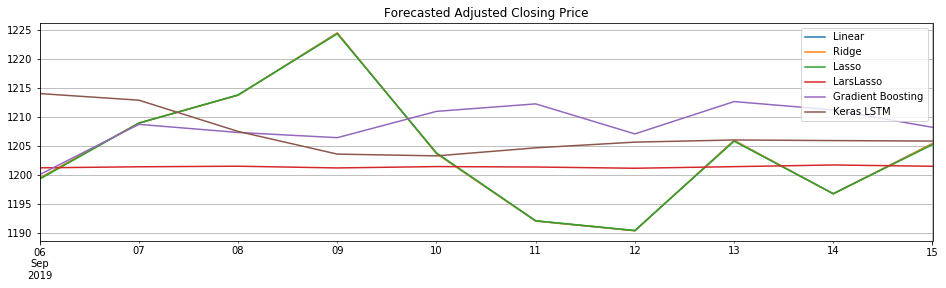

In [181]:
from datetime import timedelta, datetime
last_date = datetime.strptime(df.index[-1], '%Y-%m-%d')
df_forecast = pd.DataFrame()
df_forecast["Linear"] = values["linear"]
df_forecast["Ridge"] = values["ridge"]
df_forecast["Lasso"] = values["lasso"]
df_forecast["LarsLasso"] = values["larslasso"]
df_forecast["Gradient Boosting"] = values["gb"]
df_forecast["Keras LSTM"] = values["keras"]
df_forecast.index = pd.date_range(start=last_date, periods=num_days)
df_forecast.plot(label='GOOG', figsize=(16,4), title='Forecasted Adjusted Closing Price', grid=True)